### Pair programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning.

Para eso recordad que:

- Deberéis separar la X y la y.

- Deberéis crear el train y el test.

- Ajustar vuestro modelo.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [2]:
df = pd.read_csv("data/adults_encoding.csv", index_col = 0)
df.head()

,education_yrs,capital_gain,capital_lost,hours_week,salary,gender_map,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
39,,,,,,,,,,,,,,,,,,,,,
50,-0.333333,0.0,0.0,-2.0,24006,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,0.666667,0.0,0.0,0.0,44640,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53,-0.333333,0.0,0.0,4.0,18011,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,-0.333333,0.0,0.0,0.0,29747,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0.000000,0.0,0.0,-0.4,19350,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.head()

,education_yrs,capital_gain,capital_lost,hours_week,salary,gender_map,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
39,,,,,,,,,,,,,,,,,,,,,
50,-0.333333,0.0,0.0,-2.0,24006,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,0.666667,0.0,0.0,0.0,44640,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53,-0.333333,0.0,0.0,4.0,18011,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,-0.333333,0.0,0.0,0.0,29747,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0.000000,0.0,0.0,-0.4,19350,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
x = df.drop("salary", axis = 1)
y = df["salary"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
#iniciamos el modelo 
lr = LinearRegression()

In [7]:
#entrenamos el modelo 
lr.fit(x_train, y_train)

LinearRegression()

In [8]:
# Realizamos las predicciones con nuestro modelo
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [9]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
39,,,
20,40067,31842.448028,Train
21,32109,25478.439508,Train
64,36787,69284.634111,Train
26,44965,46745.771675,Train
21,45074,73285.110421,Train


In [10]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(20)

,Real,Predicted,Set,residuos
39,,,,
59,192523,99459.573465,Train,93063.426535
29,46150,79597.396218,Train,-33447.396218
28,28938,47006.139323,Test,-18068.139323
54,25068,100081.580517,Test,-75013.580517
37,36935,83577.180879,Train,-46642.180879
18,44762,35785.820312,Test,8976.179688
33,295691,123776.716932,Train,171914.283068
35,63643,80957.851955,Train,-17314.851955
25,33684,84739.801419,Test,-51055.801419


In [11]:
resultados.to_csv("data/adults.resultados_metricas.csv")

Si el residuo es negativo, eso quiere decir que el valor de y está sobreestimado, en este caso esto nos quiere decir que los salarios están siendo representados como más de su valor.

KeyboardInterrupt: 

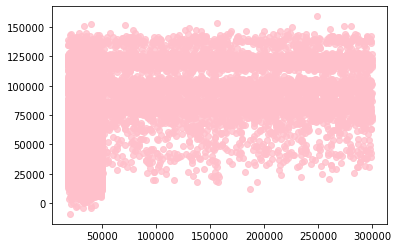

In [12]:
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted",
            color = "pink",
            line_kws = {"color": "red", "alpha": 0.7 })

<AxesSubplot:xlabel='Real', ylabel='Predicted'>

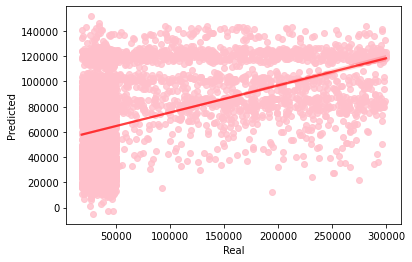

In [ ]:
sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "pink",
            line_kws = {"color": "red", "alpha": 0.7 })


### **CORRER:**

KeyboardInterrupt: 

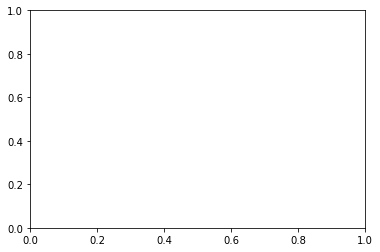

In [ ]:
sns.histplot(resultados[resultados['Set'] == "Train"],
             x = "residuos",
             color = "pink",
             kde=True)

In [ ]:
sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True)

In [ ]:
# Validación cruzada repetida con una única métrica

cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = x, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-62040.64866056 -61250.18396476 -61298.48044281 -63584.87642416
 -61131.66402667 -62196.78037616 -61373.74068006 -62475.96304974
 -63801.78319081 -64498.27007999]
Média métricas de validación cruzada: -62365.2390895728


In [ ]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = x,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.699198,0.016627,0.231602,-62040.648661
1,0.501455,0.016348,0.215618,-61250.183965
2,0.282724,0.013031,0.206403,-61298.480443
3,0.295574,0.006604,0.211162,-63584.876424
4,0.327009,0.015632,0.214309,-61131.664027
5,0.287172,0.016406,0.199876,-62196.780376
6,0.314120,0.009995,0.217076,-61373.740680
7,0.325395,0.012884,0.222564,-62475.963050
8,0.300970,0.013913,0.221129,-63801.783191
9,0.293219,0.007749,0.203389,-64498.270080


In [ ]:
print(f'La media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'La media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

La media para el r2 es 0.29
La media para el RMSE es 0.36


Esto quiere decir que nuestras variables predictoras son capaces de explicar un 29% la variable respuesta.

Al estar el RMSE cerca de 0, en un 0.36, quiere decir que nuestro modelo se equivoca en 0.36 dólares en el salario, lo que significa que nos está dando buenas predicciones.